# Palmer Penguins

***

The Palmer penguins dataset by Allison Horst, Alison Hill, and Dr. Kristen Gorman contains a number of measurements for three different species of penguins located in the Palmer Archipelago, Antartica. Dr. Kristen Gorman gathered the data between 2007 and 2009 with the Palmer Station Long Term Ecological Research Program. More information about the dataset and its official documentation is available [here](https://allisonhorst.github.io/palmerpenguins/index.html).

This is my analaysis of the Palmer penguins dataset using python.

<div>
<img src="https://www.frontiersin.org/files/Articles/526092/fmars-08-526092-HTML/image_m/fmars-08-526092-g001.jpg" alt="Palmer Station, Antartica" style="width:400px;"/>
</div>

*Palmer Station, Antartica.*

## Import the Python Modules

I have used python along with the python modules [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/), [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/pyplot.html) and [seaborn](https://seaborn.pydata.org/index.html) to analyse and plot the data.

In [28]:
# Let's import the python modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data
The dataset I am using for my analysis is sourced from [Michael Waskom's seaborn-data repository on GitHub](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv).

In [29]:
# Let's load the penguins dataset into a DataFrame using pandas.
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## First Look at the Data

Let's take a look at the first five rows of the dataset to ensure it has loaded into the notebook.

In [30]:
# Let's take a look at the data.
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Now that the data is loaded, let's take a look at the shape of the dataset and variables contained within.

In [45]:
# The shape of the dataset.
print(f"Rows, Columns: {penguins.shape}")

# The variables of the dataset.
print("\nVariables:")
for column in penguins.columns:
    print(column)

Rows, Columns: (344, 7)

Variables:
species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex


We can see above that the dataset consists of 344 rows and 7 columns. Each row represents an individual penguin and each column represents a different variable.

The variables include species, island and sex; bill length, bill depth and flipper length, each measured in millimetres; and body mass, measured in grams.

## Data Types

Data type is an important concept when it comes to progamming, as different data types can do different things according to [W3Schools](https://www.w3schools.com/python/python_datatypes.asp). Each variable in the dataset can store data of different types, and the data types will inform us how each variable can be analysed and visualised. Therefore, it is essential that we know the data types we are working with. At first glance, we would expect the penguins dataset to contain text and numeric values, so let's take a look at how these are stored in the pandas DataFrame.

In [32]:
# Let's take a look at the data types.
print(f"\n\nVariables:\t  Data Type:\n{penguins.dtypes}")



Variables:	  Data Type:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


Species, island and sex all have data type object. Based on the [pandas documentation on types](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dtypes), this indicates that these variables contain text or string data. Bill length, bill depth, flipper length and body mass all have data type float64. This tells us that these variables contain floating point numbers. The penguins DataFrame has the data type object, as it contains of different types data.

Now that we know the data types of the variables we can further explore the data.

### String Variables

First, let's take a look at the string variables. It will be useful to see what data is contained within these.

When we get the unique values of each string variable as below, we see that there are three species of penguin in the dataset; Adelie, Chinstrap and Gentoo. There are also three islands; Torgersen, Biscoe and Dream. Sex contains male, female and nan, where nan represents null or missing data in the penguins DataFrame.

In [33]:
# Let's take a look at the unique data in each variable.
species_names = penguins['species'].unique()
island_names = penguins['island'].unique()
sex_values = penguins['sex'].unique()

# Show.
print(f"Species:\t{species_names}\nIsland:\t\t{island_names}\nSex:\t\t{sex_values}")

Species:	['Adelie' 'Chinstrap' 'Gentoo']
Island:		['Torgersen' 'Biscoe' 'Dream']
Sex:		['MALE' 'FEMALE' nan]


<div>
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" alt="The Palmer Archipelago penguins. Artwork by @allison_horst." style="width:400px;"/>
</div>

*The Palmer Archipelago penguins. Artwork by @allison_horst.*

Getting the value counts of these variables is also a useful endeavour. For example, we can see below that the Adelie species is the most observed in the dataset with data collected for 152 Adelie penguins. The below also shows that the counts are stored as integers in the data type int64.

In [34]:
# Count the number of penguins in each varialbe.
species_count = penguins['species'].value_counts()
island_count = penguins['island'].value_counts()
sex_count = penguins['sex'].value_counts()

# Show.
print(f"{species_count}\n\n{island_count}\n\n{sex_count}")

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

sex
MALE      168
FEMALE    165
Name: count, dtype: int64


### Numerical Variables

Next, let's take a look at the numerical variables. It will be useful to see the average measurements of the penguins along with some other descriptive statistics.

In [35]:
# Describe the dataset.
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Above, we can see a statistical summary of the numerical values. For example, the average bill length is 43.92193 millimetres, the minimum flipper length is 172 millimetres, and the maximum body mass is 6,300 grams.

All the above data is insightful. However, if we plot the data, it will allow for easy comparison and visualisation of the different variables.

## Bar Charts

According to [a complete guide to bar charts](https://www.atlassian.com/data/charts/bar-chart-complete-guide), bar charts can be used to plot the numeric values of variables as bars. Each variable is represented with a bar, and the length of the bar reflects the variable's value. Bar charts allow for easy comparison of variables.

First, let's create a bar chart to compare the count of male and female penguins using matplotlib.pyplot.

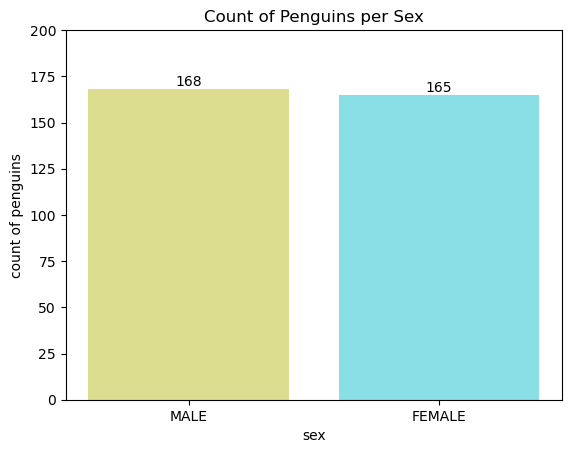

In [36]:
# First get the count of male and female penguins.
penguins_sex = penguins['sex'].value_counts()

# Now let's use subplots to create the bar chart.
fig, ax = plt.subplots()

# Select the type of plot, x and y variables, bar colours.
plot = ax.bar(penguins_sex.index, penguins_sex, color=['tab:olive', 'tab:cyan'], alpha=0.5)

# Set the axix labels, y axis limits, title.
ax.set_xlabel('sex')
ax.set_ylabel('count of penguins')
ax.set_ylim(0, 200)
ax.set_title('Count of Penguins per Sex')

# Add the count to bar labels.
# Adapted from:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#bar-label-demo.
ax.bar_label(plot)

# Show the plot.
plt.show()

We can see above, that there are 168 male penguins and 165 female penguins.

Now let's create a bar chart to summarize and compare the counts of penguin species per island.

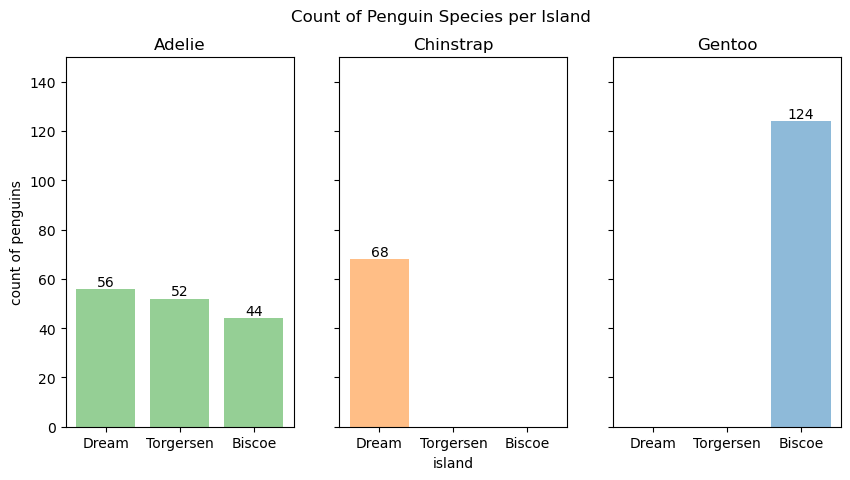

In [50]:
# First let's get the count of each penguin species per island.
adelie_count = penguins[
    penguins['species'] == "Adelie"]['island'].value_counts()

chinstrap_count = penguins[
    penguins['species'] == "Chinstrap"]['island'].value_counts()

gentoo_count = penguins[
    penguins['species'] == "Gentoo"]['island'].value_counts()

# Now let's use subplots to include the plot of each count in one figure.
# Adapted from:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)

# Select the plot type, x & y axis, bar colour.
plot1 = ax1.bar(adelie_count.index, adelie_count, color='tab:green', alpha=0.5)

# Set y axis label, title, y axis limits.
ax1.set_ylabel("count of penguins")
ax1.set_title("Adelie")
ax1.set_ylim(0, 150)

# Add the count to bar labels.
ax1.bar_label(plot1)

# Select the plot type, x & y axis, bar colour.
plot2 = ax2.bar(chinstrap_count.index, chinstrap_count, color='tab:orange', alpha=0.5)

# Set x axis label, title, bar label.
ax2.set_xlabel("island")
ax2.set_title("Chinstrap")
ax2.bar_label(plot2)

# Select the plot type, x & y axis, and bar colour.
plot3 = ax3.bar(gentoo_count.index, gentoo_count, color='tab:blue', alpha=0.5)

# Set the title, bar label.
ax3.set_title("Gentoo")
ax3.bar_label(plot3)

# Format figure & add title.
fig.set_figwidth(10)
fig.align_xlabels()
fig.suptitle("Count of Penguin Species per Island")

# Show the bar chart.
plt.show()

Taking a look at the bar chart above, we can quickly see that the Adelie species was the only species to be observed across all three islands in the dataset, and that Torgersen Island had only one species of penguin.

## Histograms

Histograms can be used to plot the distribution of a variable's values as a series of bars, according to [a complete guide to histograms](https://www.atlassian.com/data/charts/histogram-complete-guide). Each bar is called a bin, and the height of the bin represents the frequency of data points within each interval.

Let's plot the penguin flipper lengths using a histogram.

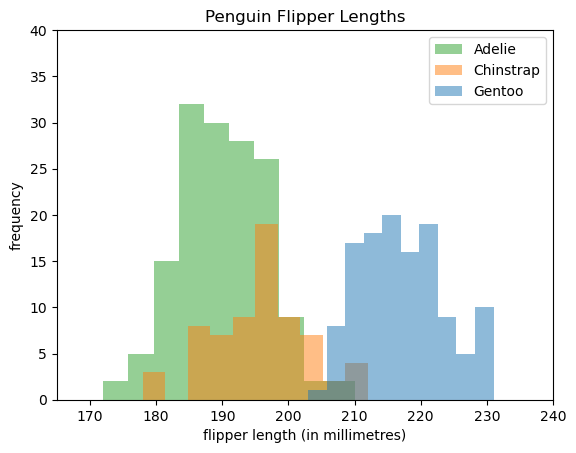

In [49]:
# First let's get the flipper length per species and convert to a numpy array.
flipper_length_adelie = penguins[
    penguins['species'] == "Adelie"]['flipper_length_mm'].to_numpy()

flipper_length_chinstrap = penguins[
    penguins['species'] == "Chinstrap"]['flipper_length_mm'].to_numpy()

flipper_length_gentoo = penguins[
    penguins['species'] == "Gentoo"]['flipper_length_mm'].to_numpy()

# Use subplots to create the histogram.
fig, ax = plt.subplots()

# Select the plot type, legend label, bar colour, transparency, number of bins.
ax.hist(flipper_length_adelie, label='Adelie', color='tab:green', alpha=0.5, bins=10)
ax.hist(flipper_length_chinstrap, label='Chinstrap', color='tab:orange', alpha=0.5, bins=10)
ax.hist(flipper_length_gentoo, label='Gentoo', color='tab:blue', alpha=0.5, bins=10)

# Set the axis labels, axis limits, title.
ax.set_xlabel('flipper length (in millimetres)')
ax.set_ylabel('frequency')
ax.set_xlim(165, 240)
ax.set_ylim(0, 40)
ax.set_title('Penguin Flipper Lengths')

# Add legend.
ax.legend()

# Show the histogram.
plt.show()

Taking a look at the histogram, the flipper lengths appear to have a normal distrubion across each species. The highest frequencies appear to fall between 185mm and 195mm for the Adelie species, between 190mm and 200mm for the Chinstrap species, and between 210mm and 220mm for the Gentoo species.

## Two Variable Plots and Correlation

Now let's select two variables from the dataset and invesigate the correlation between them.

Correlation is the relationship between two variables, and the correlation coefficient measures the strength of the relationship. According to [Investopedia's definition](https://www.investopedia.com/terms/p/pearsoncoefficient.asp), the correlation coefficient ranges from minus 1 to plus 1, where a coefficient of either minus or plus 1 indicates perfect correlation. A coeffiecient of zero indicates that no correlation exists. Positive correlations signal that both variables move in the same direction, while negative correlations signal that as one variable increases, the other decreases.

Placing two variables on a scatter plot is an effective way to visualise their correlation. A scatter plot that resembles a straight line indicates a linear relationship between the variables. A quick way to do this is to use [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to plot each combination of variables.

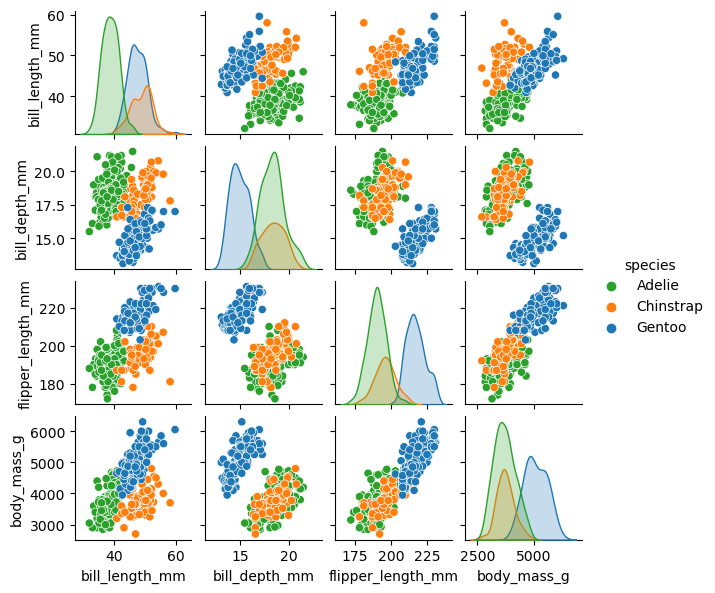

In [51]:
# Filter warnings due to bug: https://github.com/matplotlib/matplotlib/issues/26290
import warnings
warnings.filterwarnings('ignore')

# Let's plot all the variables.
# Adapted from:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot.
sns.pairplot(penguins, hue='species', palette={
    'Adelie': 'tab:green', 'Chinstrap': 'tab:orange', 'Gentoo': 'tab:blue'}, height=1.5)

Looking at the plots above, body mass and flipper length appear to have a strong linear relationship. Let's further investigate the correlation between these two variables.

### Flipper Length and Body Mass

Let's create a scatter plot usign matplotlib.pyplot with flipper length on the x axis and body mass on the y axis, and also measure the correlation using numpy.

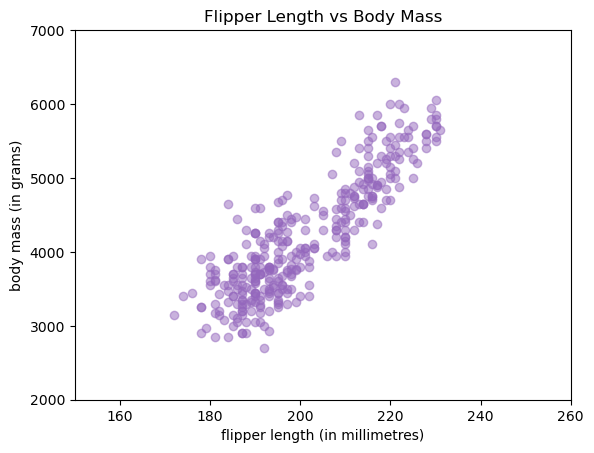

Correlation Coefficient: [0.87120177]


In [40]:
# Let's get the numpy array of each variable
flipper_length = penguins["flipper_length_mm"].to_numpy()
body_mass = penguins["body_mass_g"].to_numpy()

# Use subplots to create the plot.
fig, ax = plt.subplots()

# Select x and y variables, marker shape, colour.
ax.plot(flipper_length, body_mass, "o", color='tab:purple', alpha=0.5)

# Set axis labels, limits and title.
ax.set_xlabel('flipper length (in millimetres)')
ax.set_ylabel('body mass (in grams)')
ax.set_xlim(150, 260)
ax.set_ylim(2000, 7000)
ax.set_title('Flipper Length vs Body Mass')

# Show.
plt.show()

# Let's measure the correlation coefficient.
# I will need to remove any nan values from the numpy array.
# Adapted from https://www.statology.org/numpy-remove-nan/.
x = flipper_length[~np.isnan(flipper_length)]
y = body_mass[~np.isnan(body_mass)]

# Calculate the coefficient.
corr = np.corrcoef(x, y)

# Print.
print(f"Correlation Coefficient: {corr[0,1:]}")


Looking at the scatter plot above we can see clearly see that as body mass increases, flipper length increases. The correlation coefficient is 0.87120177. A coefficient greater than 0.8 also indicates that a fairly strong positive relationship exists between the variables, according to [Statistics By Jim](https://statisticsbyjim.com/basics/correlations/).

Now, let's look at the same two variables, but this time at the sex level.

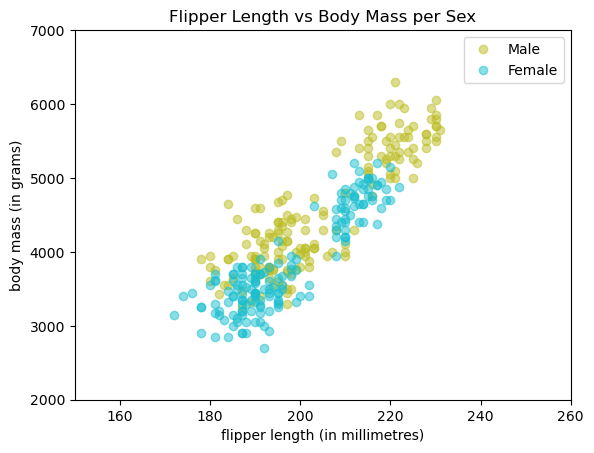

Correlation Coefficient (Male): [0.86549865]       
Correlation Coefficient (Female): [0.88482498]


In [52]:
# Let's get the numpy array of each variable
flipper_length_m = penguins[
    penguins['sex'] == 'MALE']['flipper_length_mm'].to_numpy()

body_mass_m = penguins[
    penguins['sex'] == 'MALE']['body_mass_g'].to_numpy()

flipper_length_f = penguins[
    penguins['sex'] == 'FEMALE']['flipper_length_mm'].to_numpy()

body_mass_f = penguins[
    penguins['sex'] == 'FEMALE']['body_mass_g'].to_numpy()

# Use subplots to create the plot.
fig, ax = plt.subplots()

# Select x and y variables, marker shape, colour, labels.
ax.plot(flipper_length_m, body_mass_m, 'o', color='tab:olive',
        alpha=0.5, label='Male')

ax.plot(flipper_length_f, body_mass_f, 'o', color='tab:cyan',
        alpha=0.5, label='Female')

# Set axis labels, limits and title.
ax.set_xlabel('flipper length (in millimetres)')
ax.set_ylabel('body mass (in grams)')
ax.set_xlim(150, 260)
ax.set_ylim(2000, 7000)
ax.set_title('Flipper Length vs Body Mass per Sex')
ax.legend()

# Show.
plt.show()

# Calculate the coefficient.
corr1 = np.corrcoef(flipper_length_m, body_mass_m)
corr2 = np.corrcoef(flipper_length_f, body_mass_f)

# Print.
print(f"Correlation Coefficient (Male): {corr1[0,1:]} \
      \nCorrelation Coefficient (Female): {corr2[0,1:]}")


Again, we can see from the plot that a strong positive relationship appears to exist between the variables for both male and female penguins. The correlation coefficients of 0.86549865 for male penguins and 0.88482498 for female penguins suggests the same.

Finally let's look at the relationship between flipper length and body mass at the species level.

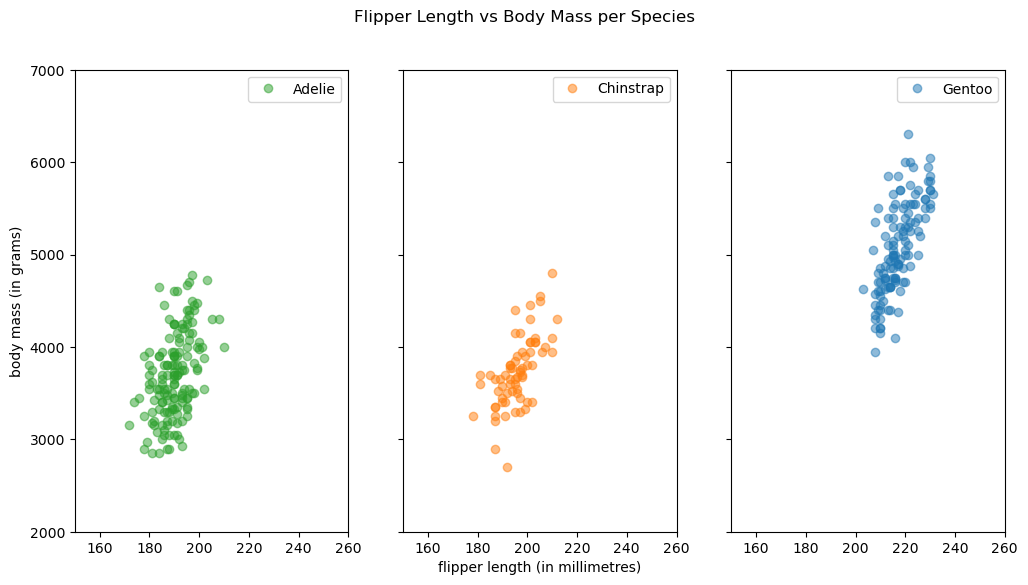

Correlation Coefficient (Adelie): 	[0.46820169]       
Correlation Coefficient (Chinstrap): 	[0.64155941]       
Correlation Coefficient (Gentoo): 	[0.70266652]


In [53]:
# Let's get the numpy array of each variable
flipper_length_a = penguins[
    penguins['species'] == 'Adelie']['flipper_length_mm'].to_numpy()

body_mass_a = penguins[
    penguins['species'] == 'Adelie']['body_mass_g'].to_numpy()

flipper_length_c = penguins[
    penguins['species'] == 'Chinstrap']['flipper_length_mm'].to_numpy()

body_mass_c = penguins[
    penguins['species'] == 'Chinstrap']['body_mass_g'].to_numpy()

flipper_length_g = penguins[
    penguins['species'] == 'Gentoo']['flipper_length_mm'].to_numpy()

body_mass_g = penguins[
    penguins['species'] == 'Gentoo']['body_mass_g'].to_numpy()

# Use subplots to create the plot.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6),
                                    sharex=True, sharey=True)

# Select x and y variables, marker shape, colour, labels.
ax1.plot(flipper_length_a, body_mass_a, 'o', color='tab:green',
         alpha=0.5, label='Adelie')

ax2.plot(flipper_length_c, body_mass_c, 'o', color='tab:orange',
         alpha=0.5, label='Chinstrap')

ax3.plot(flipper_length_g, body_mass_g, 'o', color='tab:blue',
         alpha=0.5, label='Gentoo')

# Set axis labels, limits and title.
ax1.set_ylabel('body mass (in grams)')
ax1.set_xlim(150, 260)
ax1.set_ylim(2000, 7000)
ax1.legend()

ax2.set_xlabel('flipper length (in millimetres)')
ax2.legend()

ax3.legend()

fig.suptitle('Flipper Length vs Body Mass per Species')

# Show.
plt.show()

# Remove nan values from arrays.
flipper_length_a_nan = flipper_length_a[~np.isnan(flipper_length_a)]
body_mass_a_nan = body_mass_a[~np.isnan(body_mass_a)]

flipper_length_g_nan = flipper_length_g[~np.isnan(flipper_length_g)]
body_mass_g_nan = body_mass_g[~np.isnan(body_mass_g)]

# Calculate the coefficient.
corr_a = np.corrcoef(flipper_length_a_nan, body_mass_a_nan)
corr_c = np.corrcoef(flipper_length_c, body_mass_c)
corr_g = np.corrcoef(flipper_length_g_nan, body_mass_g_nan)

# Print.
print(f"Correlation Coefficient (Adelie): \t{corr_a[0,1:]} \
      \nCorrelation Coefficient (Chinstrap): \t{corr_c[0,1:]} \
      \nCorrelation Coefficient (Gentoo): \t{corr_g[0,1:]}")


Looking a the plots we can see that there is a positive relationship between flipper length and body mass across the three species. However, we can see start to see some variation across the species when it comes to the strength of the correlation. Gentoo's correlation coefficient of 0.70266652 indicates a strong positive relationship, while Adelie's coefficient of 0.46820129 and Chinstrap's coefficient's of 0.64155941 indicates a more moderate correlation.

In summary, flipper length and body mass appear to have a fairly strong positive relationship across the total penguin population in the dataset. There is very little variation in this relationship across male and female penguins and some slight variation across the three species.

***

### End